# Importação das Bibliotecas

In [1]:
import numpy as np
import pandas as pd
from scipy.io import wavfile as wav
import struct
import matplotlib.pyplot as plt
import glob
import os

path = os.getcwd()
# name_bases = os.listdir('Trabalho_de_processamento/Ballroom/')



# Variaveis global

In [2]:

arquivo= glob.glob(path+f'/Ballroom/*/*.wav')
linha = len(arquivo)
contador = 0


# Criando a Matriz de armazenamento de dados

In [3]:
matriz = []
for i in range(linha):
    matriz.append([])
    for j in range(5):
        matriz[i].append([])

# Função de Extrassão de Caracteristicas


In [4]:
def extrassao_de_dados_da_classe(caminho,linhas):
    rate, wav_sample = wav.read(caminho)
    wave_file = open(caminho,"rb")
    riff_fmt = wave_file.read(36)
    bit_depth_string = riff_fmt[-2:]
    bit_depth = struct.unpack("H",bit_depth_string)[0]
  
    #pegar nome da pasta
    final = caminho.rfind("/")
    inicio = caminho.rfind("/",1,final-1)
    nome_base=caminho[inicio+1:final]

   
    armazena_dados_na_matriz(rate,wav_sample.shape[0],bit_depth,wav_sample.shape[0]/rate,nome_base)
    
    return contador + 1
    

# Salva os dados na matriz

In [5]:
def armazena_dados_na_matriz(taxa,canais,bits,duracao,nome_base):
    matriz[contador][0] = duracao
    matriz[contador][1] = taxa
    matriz[contador][2] = bits
    matriz[contador][3] = canais
    matriz[contador][4] = nome_base


# Abre todos os aquivos .wav da pasta (Nome da pasta)


In [6]:
for i in arquivo:
    contador = extrassao_de_dados_da_classe(i,linha)
    

/home/arlaxad/Documentos/TEIA/processamento/processo_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  


# Salvando arquivo .csv

In [23]:
cabecario = ['Duration','Frequency','Bits','Channels','Class']
pd.DataFrame(matriz).to_csv(path+f"/csv/Base_Ballroom.csv", header = cabecario)

In [15]:
#mostrar arquivo
metadata_path = pd.read_csv(path+f"/csv/Base_Ballroom.csv",index_col = 0)
metadata_path
  

,Duration,Frequency,Bits,Channels,Class
0,30.047506,44100,16,1325095,Tango
1,31.787937,44100,16,1401848,Tango
2,30.092336,44100,16,1327072,Tango
3,31.787937,44100,16,1401848,Tango
4,31.787937,44100,16,1401848,Tango
...,...,...,...,...,...
693,31.787937,44100,16,1401848,Waltz
694,31.787937,44100,16,1401848,Waltz
695,30.143537,44100,16,1329330,Waltz
696,31.787937,44100,16,1401848,Waltz


# Plotagem de gráficos

## Gráfico do Tamanho dos aúdios

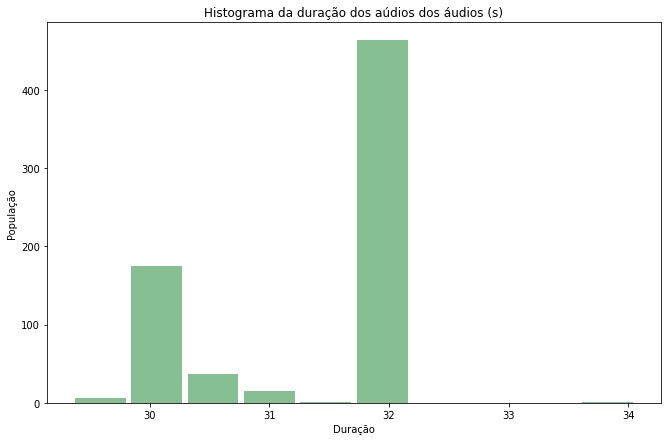

In [42]:
plt.hist(metadata_path['Duration'], rwidth=0.9, color='#86bf91')
plt.rcParams['figure.figsize'] = (11,7)
plt.xlabel('Duração')
plt.ylabel('População')
plt.title('Histograma da duração dos aúdios dos áudios (s)')
plt.grid(False)
plt.show()



## Gráfico da Frequência dos aúdios

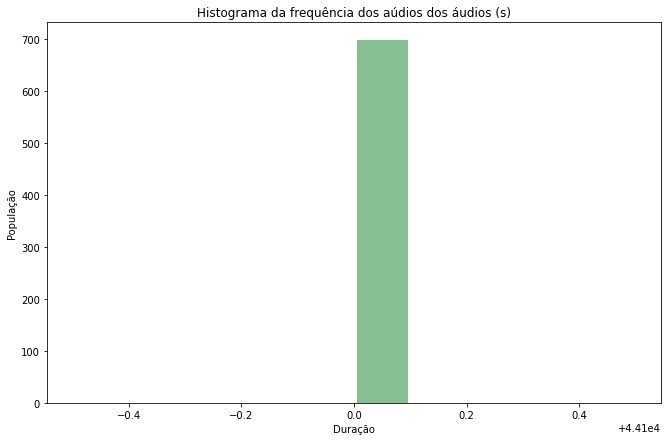

In [41]:
plt.hist(metadata_path['Frequency'], rwidth=0.9, color='#86bf91')
plt.rcParams['figure.figsize'] = (11,7)
plt.xlabel('Duração')
plt.ylabel('População')
plt.title('Histograma da frequência dos aúdios dos áudios (s)')
plt.grid(False)
plt.show()

## Gráfico dos Bits dos aúdios

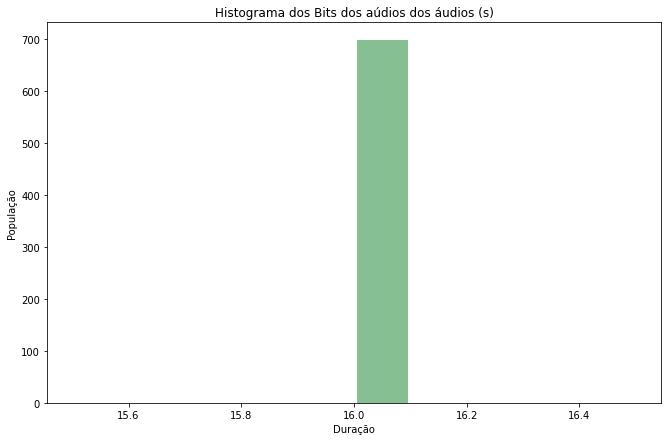

In [40]:
plt.hist(metadata_path['Bits'], rwidth=0.9, color='#86bf91')
plt.rcParams['figure.figsize'] = (11,7)
plt.xlabel('Duração')
plt.ylabel('População')
plt.title('Histograma dos Bits dos aúdios dos áudios (s)')
plt.grid(False)
plt.show()

## Gráfico dos Canais dos aúdios

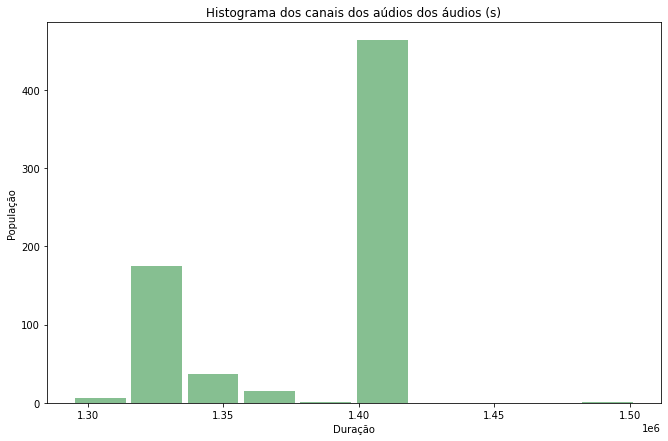

In [39]:
plt.hist(metadata_path['Channels'], rwidth=0.9, color='#86bf91')
plt.rcParams['figure.figsize'] = (11,7)
plt.xlabel('Duração')
plt.ylabel('População')
plt.title('Histograma dos canais dos aúdios dos áudios (s)')
plt.grid(False)
plt.show()

## Gráfico das Classes dos aúdios

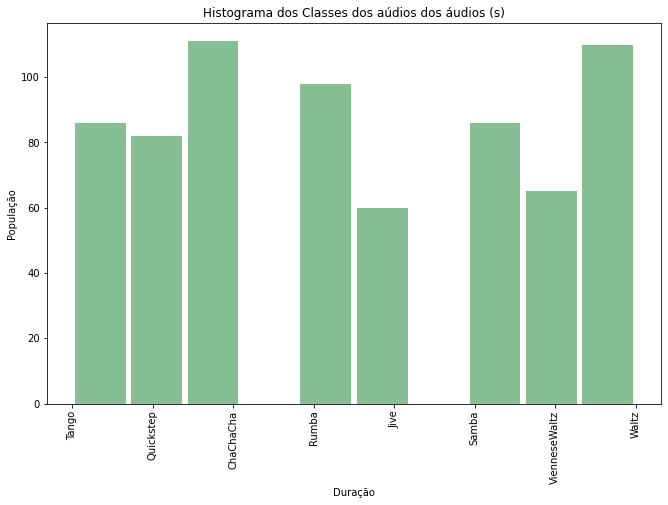

In [53]:
plt.hist(metadata_path['Class'], rwidth=0.9, color='#86bf91')
plt.rcParams['figure.figsize'] = (11,7)
plt.xlabel('Duração')
plt.xticks(rotation=90)
plt.ylabel('População')
plt.title('Histograma dos Classes dos aúdios dos áudios (s)')
plt.grid(False)
plt.show()

# Quantidade de aúdios por classe

In [25]:
metadata_path['Class'].value_counts()

ChaChaCha        111
Waltz            110
Rumba             98
Samba             86
Tango             86
Quickstep         82
VienneseWaltz     65
Jive              60
Name: Class, dtype: int64